# General solution to the Unbalanced Wheatstone Bridge using only Kirchoff's laws for current and voltage

## Introduction

First of all, let us define our problem. 

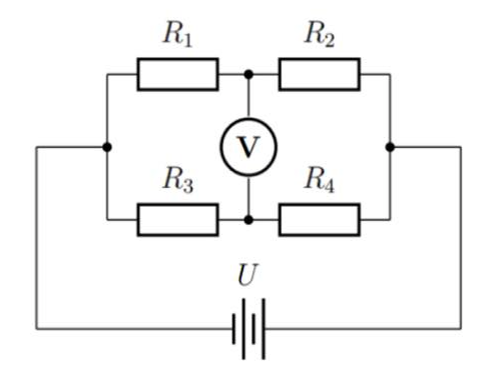

Here, the values for resistors are $R_1 = 15 \Omega, R_2 = 85 \Omega, R_3 = 25 \Omega, R_4 = 175 \Omega $ and the battery voltage is $U = 20 V$.

Our task is to find the voltage value on the voltmeter.

## System of equations

Using Kirchhoff's I law or Kirchhoff's current law, we can define these four equations.

#### $$\sum_{i=1}^{N} I = 0$$

$$
\begin{align*}
I_1 &= I_2 + I_3 \\
I_2 &= I_4 + I_5 \\
I_3 &+ I_4 = I_6 \\
I_5 &+ I_6 = I_1 \\
\end{align*}
$$

Using Kirchhoff's II law or Kirchhoff's voltage law, we can define these four equations.

#### $$\sum_{i=1}^{N} U = 0$$

$$
\begin{align*}
R_3 I_2 - R_1 I_3 + V       = 0 \\
-V      - R_2 I_6 + R_4 I_5 = 0 \\
U       - R_1 I_3 - R_2 I_6 = 0 \\
U       - R_3 I_2 - R_4 I_5 = 0 \\
\end{align*}
$$

Now, currently we have $8$ equations in total but we have $6$ unknown currents: $I_1, I_2, I_3, I_4, I_5, I_6$.

Therefore, if we wish to solve this equation, we pick six equations from these $8$ equations. However, we need to be careful of the equation that we choose and how we present them.

Going forward, let us take the first and last current equations and all the voltage equations. Representing the Ohm's law matrix directly, we get

$$\mathbf{R} \cdot \mathbf{i} = \mathbf{u}$$
$$
\begin{bmatrix} 
    1 & -1 & -1   &  0   &    0      &    0 \\
    1 &  0 &  0   &  0   &   -1      &   -1 \\

    0 &  R_3 & -R_1 &  0 &    0    & 0 \\
    0 &  0 &  0   &  0   &    R_4    &   -R_2 \\
    0 &  0 &  R_1 &  0   &    0      &    R_2 \\
    0 &  R_3 &  0   &  0 & R_4 &     0 \\
\end{bmatrix} \cdot
\begin{bmatrix}
    I_1 \\
    I_2 \\
    I_3 \\
    I_4 \\
    I_5 \\
    I_6
\end{bmatrix} = 
\begin{bmatrix}
    0 \\
    0 \\
    -V \\
     V \\
     U \\
     U
\end{bmatrix}
$$

As we know, if we want to find the solutions of $\mathbf{i}$, we transform our problem like so

$$
 R^{-1} \cdot | \: R \cdot i = u, \\
R^{-1} R \cdot i = R^{-1} \cdot u, \\
\boxed{i = R^{-1} \cdot u}
$$

For this we need to be able to invert our matrix $\mathbf{R}$. The equation for this is 

$$
\mathbf{A}^{-1}=\frac{1}{\operatorname{det}(\mathbf{A})} \operatorname{adj}(\mathbf{A}) =\frac{1}{\operatorname{det} \mathbf{A}}[(\operatorname{tr} \mathbf{A}) \mathbf{I}-\mathbf{A}]
$$

As a reminder:
$$
\operatorname{tr}(\mathbf{A})=\sum_{i=1}^n a_{i i}=a_{11}+a_{22}+\cdots+a_{n n}
$$

One important condition for the inverse matrix is that the $\operatorname{det}(\mathbf{A}) \neq 0$, meaning the rows need to be linearly independent. Currently, this condition is not satisfied, which is why we need to change our original $\mathbf{R}$ matrix. Firstly, we take the equation from the third row
$$
R_3 I_2 - R_1 I_3 + V = 0,
$$

and substitue the equations $I_1 = I_2 + I_3$ and $I_3 + I_4 = I_6$ as 
$$
I_2 = I_1 - I_3 \\
I_3 = I_6 - I_4
$$ 

respectively. This leaves us with the equation:

$$
-R_3 I_3 + R_1I_4 + R_3 I_5 + (R_3-R_1) I_6 = -V 
$$

In essence, our goal is to describe the last four rows in terms of $4$ currents: $I_3, I_4, I_5, I_6$.

This means we also need to change our last row from

$$
U - R_3 I_2 - R_4 I_5 = 0
$$

to 

$$
R_3 I_4 + (R_3 + R_4) I_5 = U
$$

using the substitution $I_2 = I_4 + I_5$. 

This last substitution gives us our final form for Ohm's law:

$$
\begin{bmatrix} 
    1 & -1 & -1   &  0   &    0      &    0 \\
    1 &  0 &  0   &  0   &   -1      &   -1 \\
    0 &  0 & -R_3 &  R_1 &    R_3    & (R_3-R_1) \\
    0 &  0 &  0   &  0   &    R_4    &   -R_2 \\
    0 &  0 &  R_1 &  0   &    0      &    R_2 \\
    0 &  0 &  0   &  R_3 & (R_3+R_4) &     0 \\
\end{bmatrix} \cdot
\begin{bmatrix}
    I_1 \\
    I_2 \\
    I_3 \\
    I_4 \\
    I_5 \\
    I_6
\end{bmatrix} = 
\begin{bmatrix}
    0 \\
    0 \\
    -V \\
     V \\
     U \\
     U
\end{bmatrix}
$$

which we need to solve.

In [1]:
from sympy import *

In [2]:
I_1, I_2, I_3, I_4, I_5, I_6 = symbols("I_1, I_2, I_3, I_4, I_5, I_6")
#R_1, R_2, R_3, R_4 = symbols("R_1, R_2, R_3, R_4 ")
R_1 = 15
R_2 = 85
R_3 = 25
R_4 = 175
U = 20
V = symbols("V")
pprint(V)

V


In [3]:
R = Matrix([
    #[0.0,  1.0,  0.0, -1.0, -1.0,  0.0],    # good
    #[0.0,  0.0,  1.0,  1.0,  0.0, -1.0],    # bad
    [1.0, -1.0, -1.0,  0.0,    0.0,    0.0],    # good
    [1.0,  0.0,  0.0,  0.0,   -1.0,   -1.0],    # good
    [0.0,  0.0, -R_3,  R_1,    R_3, (R_3-R_1)],
    [0.0,  0.0,  0.0,  0.0,    R_4,   -R_2],
    [0.0,  0.0,  R_1,  0.0,    0.0,    R_2],
    [0.0,  0.0,  0.0,  R_3, (R_3+R_4), 0.0]
])
R

Matrix([
[1.0, -1.0, -1.0,  0,    0,    0],
[1.0,    0,    0,  0, -1.0, -1.0],
[  0,    0,  -25, 15,   25,   10],
[  0,    0,    0,  0,  175,  -85],
[  0,    0,   15,  0,    0,   85],
[  0,    0,    0, 25,  200,    0]])

In [4]:
# This is not used in calculations, but 
# serves as a visual represenation.
i = Matrix([
    [I_1],
    [I_2],
    [I_3],
    [I_4],
    [I_5],
    [I_6],
])
i

Matrix([
[I_1],
[I_2],
[I_3],
[I_4],
[I_5],
[I_6]])

In [5]:
u = Matrix([
    [0.0],
    [0.0],
    [-V],
    [ V],
    [ U],
    [ U]
])
u

Matrix([
[ 0],
[ 0],
[-V],
[ V],
[20],
[20]])

In [6]:
Rinv = R.inv()
Rinv

Matrix([
[   0, 1.0, 0.0140794223826715, 0.0133574007220217, 0.0234657039711191, -0.00844765342960289],
[-1.0, 1.0, 0.0677797833935018, 0.0425090252707581, 0.0462996389891697,  -0.0406678700361011],
[   0,   0,          -119/2216,         -323/11080,         -253/11080,            357/11080],
[   0,   0,           -51/1385,           -91/1385,            -17/277,              86/1385],
[   0,   0,           51/11080,           91/11080,            17/2216,           -153/55400],
[   0,   0,            21/2216,           57/11080,            35/2216,            -63/11080]])

In [7]:
I_sol = simplify(Rinv * u)
I_sol
#for i in range(len(I_sol)):
#    print(I_sol[i])#, "\tI_", 2+i)

Matrix([
[0.300361010830325 - 0.000722021660649819*V],
[  0.112635379061372 - 0.0252707581227437*V],
[                        34*V/1385 + 52/277],
[                           4/277 - 8*V/277],
[                          V/277 + 136/1385],
[                         56/277 - 6*V/1385]])

This the point where we have arrived to our solution for the $\mathbf{i}$ vector:
$$
\begin{bmatrix}
    I_1 \\
    I_2 \\
    I_3 \\
    I_4 \\
    I_5 \\
    I_6
\end{bmatrix} = 
\begin{bmatrix}
    0.300361010830325 - 0.000722021660649819*V \\
    0.112635379061372 - 0.0252707581227437*V \\
    34 \cdot V/1385 + 52/277 \\
    4/277 - 8 \cdot V/277 \\
    V/277 + 136/1385 \\
    56/277 - 6 \cdot V/1385
\end{bmatrix}
$$

As we can see, $V$ is still undefined. To find this voltage value, we use Kirchoff's first law:
$$
\sum I = 0
$$

In [8]:
# Define the equation
I_sum = sum(I_sol)
print("\u03A3I =", I_sum, "= 0")
equation = Eq(I_sum, 0)

# Solve the equation for V
solution = solve(equation, V)

# Print the result
print("The value of V is:", solution[0])

ΣI = 0.915523465703971 - 0.0310469314079422*V = 0
The value of V is: 29.4883720930233


And this is our final value for the voltmeter.
$$
V = 29.4883720930233 \; \mathrm{V}
$$

Furthermore, we can now find the values for all the currents as well.

In [9]:
# Given list of equations
equations = []
for i in range(len(I_sol)):
    equations.append(I_sol[i])
print("Vector for current I:\n" ,equations)

print("\nFinal values of I:")
# Solve and print the solutions
for i, equation in enumerate(equations, start=1):
    # Create the equation using the Eq function
    eq = Eq(equation, 0)

    # Solve the equation for V
    solution = solve(eq, V)

    # Convert the solution to a decimal fraction using the Rational class
    decimal_fraction = Float(solution[0]) if solution else 'No solution'

    # Print the result
    #print(f"Current for I_{i}: {solution[0] if solution else 'No solution'}")
    print(f"Current for I_{i}: {decimal_fraction:.4f}")

Vector for current I:
 [0.300361010830325 - 0.000722021660649819*V, 0.112635379061372 - 0.0252707581227437*V, 34*V/1385 + 52/277, 4/277 - 8*V/277, V/277 + 136/1385, 56/277 - 6*V/1385]

Final values of I:
Current for I_1: 416.0000
Current for I_2: 4.4571
Current for I_3: -7.6471
Current for I_4: 0.5000
Current for I_5: -27.2000
Current for I_6: 46.6667


And we have arrived at our final solution for current values which are

$$
i = \begin{bmatrix}
    416.0000 \\
    4.4571 \\
    -7.6471 \\
    0.5000 \\
    -27.2000 \\
    46.6667 
\end{bmatrix}
$$

This marks the end of the first method of solving the Wheatstone Bridge in Python. Now on to Method 2.

# Alternative approach

Here we define all the possible equations that we can determine with Kirchoff's laws for our circuit. This leads us to solve an *overdetermined* system of linear equations. This is a simple example of what it looks like:
$$
\left[\begin{array}{cc}
2 & 1 \\
-3 & 1 \\
-1 & 1
\end{array}\right]\left[\begin{array}{l}
X \\
Y
\end{array}\right]=\left[\begin{array}{c}
-1 \\
-2 \\
1
\end{array}\right]
$$

This shows how we have more equations than there are unknowns.  Such systems may not have a unique solution (if any solution exists) because there are more constraints than degrees of freedom. In such cases, one typically aims to find the "best" solution that minimizes the error in satisfying the system of equations.

One common approach to solving overdetermined systems is the method of least squares. The idea is to find the solution that minimizes the sum of the squares of the differences between the left-hand side (LHS) and the right-hand side (RHS) of the equations.

SymPy provides a `solve()` function that can be used to solve systems of linear equations, including overdetermined systems. When dealing with overdetermined systems, `solve()` uses the least squares method by default. For this problem, I was able to define $9$ different equations to solve for $6$ unknown currents for this problem:

$$
\begin{array}{ccc}
    I_1 - I_2 - I_3 = 0  \\
    I_2 - I_4 - I_5 = 0  \\
    I_3 + I_4 - I_6 = 0  \\
    I_5 + I_6 - I_1 = 0  \\
    R_3 \cdot I_2 + R_4 \cdot I_5 = 20   \\
    R_1 \cdot I_3 + R_2 \cdot I_6 = 20   \\
    R_3 \cdot I_2 - R_1 \cdot I_3 = -V   \\
    R_4 \cdot I_5 - R_2 \cdot I_6 =  V   \\
    +R_3 \cdot I_2 - R_1 \cdot I_3 - R_2 \cdot I_6 + R_4 \cdot I_5 = 0 
\end{array}
$$

In [10]:
# Define equations
eq1 = Eq(1.0*I_1 - 1.0*I_2 - 1.0*I_3, 0)
eq2 = Eq(1.0*I_2 - 1.0*I_4 - 1.0*I_5, 0)
eq3 = Eq(1.0*I_3 + 1.0*I_4 - 1.0*I_6, 0)
eq4 = Eq(1.0*I_5 + 1.0*I_6 - 1.0*I_1, 0)
eq5 = Eq(R_3*I_2 + R_4*I_5, 20)
eq6 = Eq(R_1*I_3 + R_2*I_6, 20)
eq7 = Eq(R_3*I_2 - R_1*I_3, -V)
eq8 = Eq(R_4*I_5 - R_2*I_6,  V)
eq9 = Eq(+R_3*I_2 - R_1*I_3 - R_2*I_6 + R_4*I_5, 0)
#eq1 = Eq(I_1 - I_2 - I_3, 0)
#eq2 = Eq(I_2 - I_4 - I_5, 0)
#eq3 = Eq(I_3 + I_4 - I_6, 0)
#eq4 = Eq(I_5 + I_6 - I_1, 0)
#eq5 = Eq(U - I_2*R_3 - I_5*R_4, 0)
#eq6 = Eq(U - I_3*R_1 - I_6*R_2, 0)
#eq7 = Eq(-I_2*R_3 - V + I_3*R_1, 0)

# Solve the system
solution = solve((eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9), (I_1, I_2, I_3, I_4, I_5, I_6))

# Print the solution
print("Solution:", solution)

Solution: {I_1: 0.300361010830325 - 0.000722021660649819*V, I_2: 0.112635379061372 - 0.0252707581227437*V, I_3: 0.0245487364620939*V + 0.187725631768953, I_4: 0.0144404332129964 - 0.0288808664259928*V, I_5: 0.0036101083032491*V + 0.0981949458483754, I_6: 0.202166064981949 - 0.00433212996389892*V}


In [11]:
II = Matrix([
    solution[I_1],
    solution[I_2],
    solution[I_3],
    solution[I_4],
    solution[I_5],
    solution[I_6],
])
II

Matrix([
[0.300361010830325 - 0.000722021660649819*V],
[  0.112635379061372 - 0.0252707581227437*V],
[  0.0245487364620939*V + 0.187725631768953],
[ 0.0144404332129964 - 0.0288808664259928*V],
[ 0.0036101083032491*V + 0.0981949458483754],
[ 0.202166064981949 - 0.00433212996389892*V]])

In [12]:
print(sum(II))

0.915523465703971 - 0.0310469314079422*V


In [13]:
#0.915523465703971 = 0.0310469314079422*V
0.915523465703971/0.0310469314079422

29.488372093023287

As we can see, we arrive at the same result:
$$V = 29.488372093023287$$

----------- 

# General solution to the Balanced Wheatstone Bridge using only Kirchoff's laws for current and voltage

A balanced Wheatstone bridge means that the current across the "bridge" is $0$ or that the resistance of the voltmeter is so big that the current crossing is basically negligible. 

$$
I \sim  \frac{1}{R} \\
I \approx 0
$$

Therefore, to solve this problem, we need to find the voltage drop across the resistors $R_1$ and $R_3$ and calculate the difference.

In [14]:
Rbal = Matrix([
    [1, -1, -1],
    [0, (R_3+R_4), -(R_1+R_2)],
    [0, (R_3+R_4), 0]
])
Rbal

Matrix([
[1,  -1,   -1],
[0, 200, -100],
[0, 200,    0]])

In [15]:
Ubal = Matrix([
    [0],
    [0],
    [U]
])
Ubal

Matrix([
[ 0],
[ 0],
[20]])

In [16]:
I_bal = simplify(Rbal.inv() * Ubal)
I_bal

Matrix([
[3/10],
[1/10],
[ 1/5]])

In [17]:
U_1 = I_bal[1] * R_3
U_1

5/2

In [18]:
U_2 = I_bal[2] * R_1
U_2

3

In [19]:
U_2 - U_1

1/2